In [25]:
# Load CIFAR-10 data set
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

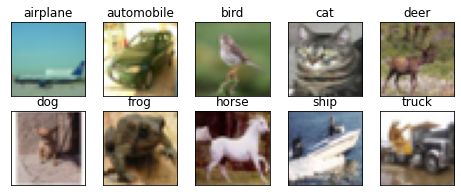

In [26]:
# Show examples from each class
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_classes = len(np.unique(y_train))
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    rnd_img = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[rnd_img,::], (0, 1, 2))
    plt.imshow(im)
plt.show()

In [27]:
# Data pre-processing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [28]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'], color="dodgerblue")
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'], color="green")
    axs[0].set_ylim(0, 1)
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'], color="darkorange")
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'], color="red")
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [29]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

learning_rate=0.001
epochs=1000
batch_size=512
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=int(epochs*0.2) )
p_dropout=0.2

# model.add(Dense(500, activation="relu", kernel_initializer="he_normal"))

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=p_dropout))
model.add(BatchNormalization())
model.add(Dense(200, activation="relu"))
model.add(Dropout(rate=p_dropout))
model.add(BatchNormalization())
model.add(Dense(150, activation="relu"))
model.add(Dropout(rate=p_dropout))
model.add(BatchNormalization())
model.add(Dense(150, activation="relu"))
model.add(Dropout(rate=p_dropout))
model.add(BatchNormalization())
model.add(Dense(100, activation="relu"))
model.add(Dropout(rate=p_dropout))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

opt = optimizers.SGD(lr=learning_rate, momentum=0.9, nesterov=True)
# opt = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               614600    
_________________________________________________________________
dropout_15 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 200)               800       
_________________________________________________________________
dense_19 (Dense)             (None, 200)               40200     
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 200)              

In [30]:
# Training
import time
start = time.time()
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test), callbacks=[es])
end = time.time()

Epoch 1/1000
98/98 [==============================] - 2s 13ms/step - loss: 2.8288 - accuracy: 0.1219 - val_loss: 2.2182 - val_accuracy: 0.2020
Epoch 2/1000
98/98 [==============================] - 1s 9ms/step - loss: 2.4514 - accuracy: 0.1824 - val_loss: 2.0735 - val_accuracy: 0.2550
Epoch 3/1000
98/98 [==============================] - 1s 9ms/step - loss: 2.2851 - accuracy: 0.2159 - val_loss: 1.9689 - val_accuracy: 0.2917
Epoch 4/1000
98/98 [==============================] - 1s 10ms/step - loss: 2.1777 - accuracy: 0.2423 - val_loss: 1.8853 - val_accuracy: 0.3249
Epoch 5/1000
98/98 [==============================] - 1s 11ms/step - loss: 2.0893 - accuracy: 0.2611 - val_loss: 1.8571 - val_accuracy: 0.3289
Epoch 6/1000
98/98 [==============================] - 1s 11ms/step - loss: 2.0402 - accuracy: 0.2742 - val_loss: 1.8236 - val_accuracy: 0.3469
Epoch 7/1000
98/98 [==============================] - 1s 10ms/step - loss: 2.0037 - accuracy: 0.2844 - val_loss: 1.7666 - val_accuracy: 0.3687
E

Definición de una red convolucional multicapa

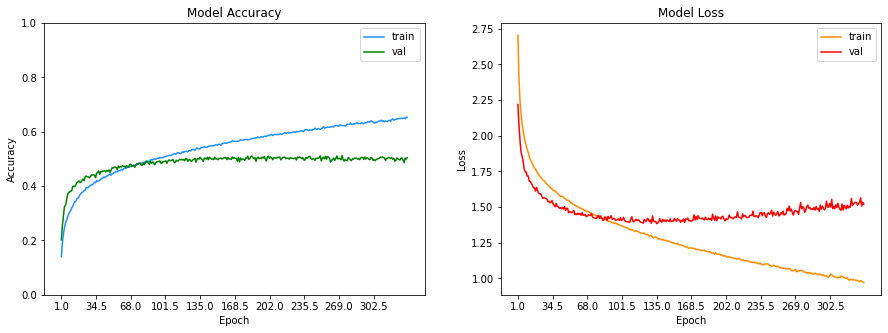

Training MLP took 335.1605944633484 seconds


In [31]:
plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [33]:
loss, acc = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 1.503757273864746
Test accuracy: 0.5597000050544739
